<a href="https://colab.research.google.com/github/Brandon56-code/ola_bike-ride-request/blob/main/Data_Clustering_and_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
!pip install gdown

In [12]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Plot style
%matplotlib inline
sns.set(style="whitegrid")


In [11]:
file_id = "1Qnpb1--5liNmMvxoe3iM6Rz4yJMkTDFH"
url = f"https://drive.google.com/uc?id={file_id}"

output = "dataset.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Qnpb1--5liNmMvxoe3iM6Rz4yJMkTDFH
To: /content/dataset.csv
100%|██████████| 648k/648k [00:00<00:00, 8.53MB/s]


'dataset.csv'

# Load & Inspect Data

In [13]:
# Replace with your dataset path
df = pd.read_csv("dataset.csv")

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nSummary:")
print(df.describe(include="all").T.head())


Shape: (10886, 12)

Columns: ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None

Summary:
              count unique                  top freq      mean     

# Feauturing and selecting data

In [14]:
# Example feature selection (adapt to your dataset)
features = ["temp", "windspeed", "humidity"]

X = df[features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled shape:", X_scaled.shape)


Scaled shape: (10886, 3)


#  Data Clustering (K-Means)

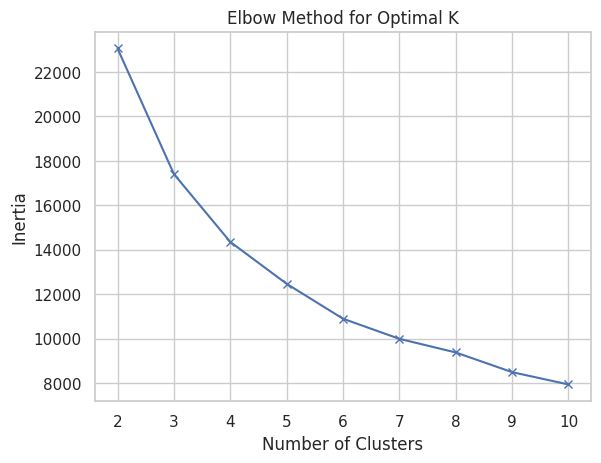

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,cluster
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [15]:
# Elbow method to find optimal K
inertia = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Final K-Means clustering (choose k, e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

df.head()


## Visualize Clusters

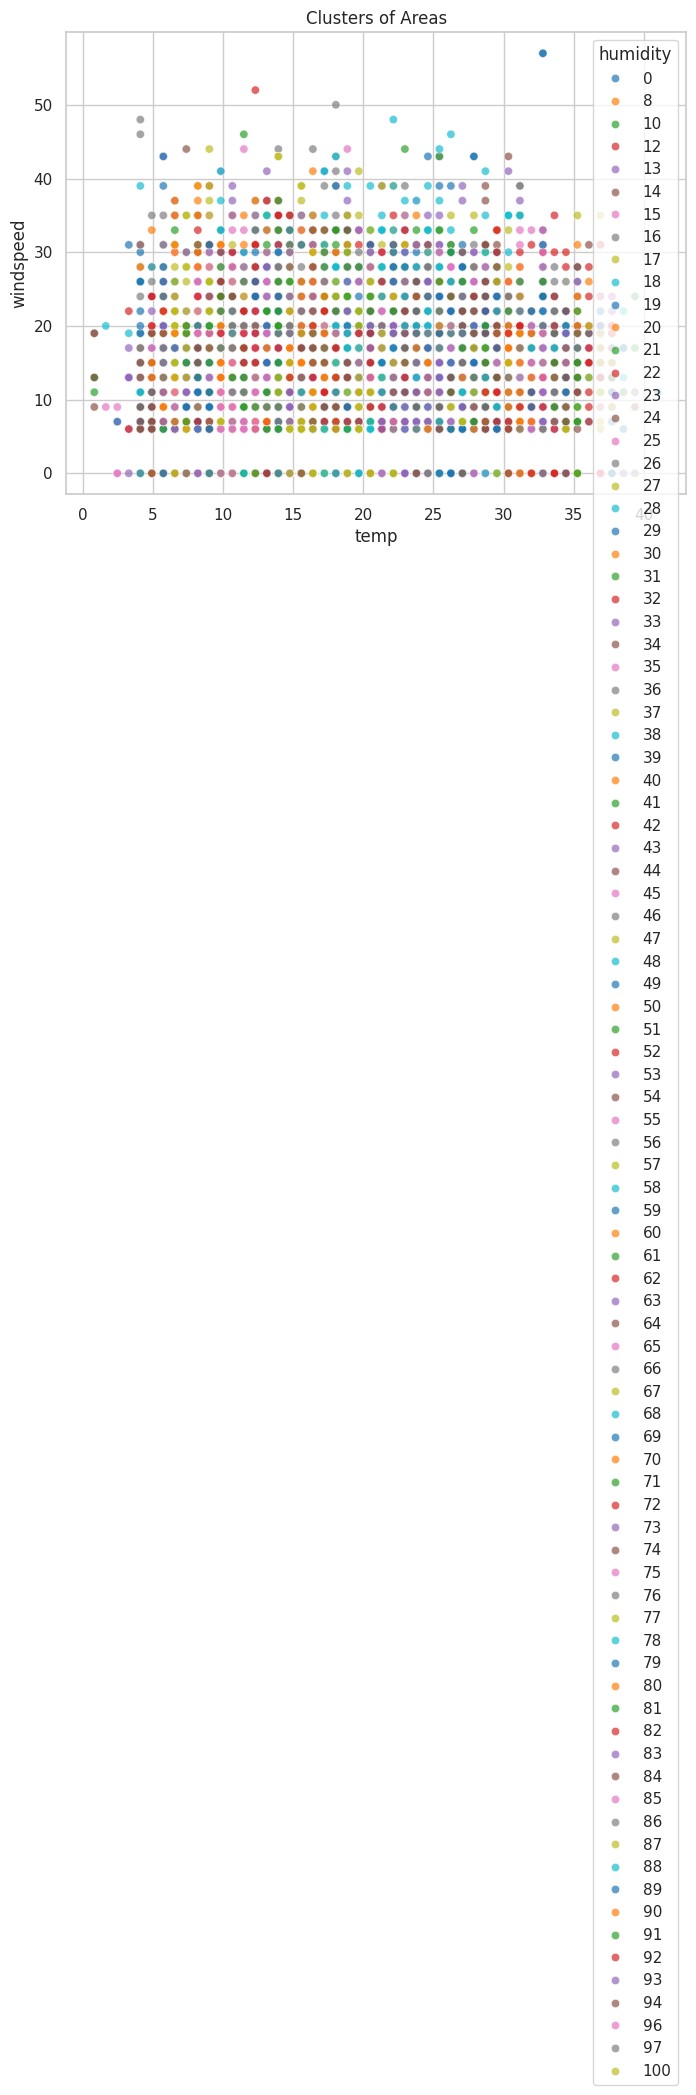

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["temp"],
    y=df["windspeed"],
    hue=df["humidity"],
    palette="tab10",
    alpha=0.7
)
plt.title("Clusters of Areas")
plt.show()


#  Machine Learning Model Training

In [16]:
# Example target for prediction
target = "temp"

# Add temporal features if available
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    df["hour"] = df["timestamp"].dt.hour
    df["day_of_week"] = df["timestamp"].dt.dayofweek
else:
    df["hour"] = np.random.randint(0,24, size=len(df))      # placeholder
    df["day_of_week"] = np.random.randint(0,7, size=len(df)) # placeholder

# Features for modeling
features_for_model = ["cluster", "hour", "day_of_week"]
X_model = df[features_for_model]
y_model = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

## Model Evaluation

In [9]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
    print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
    print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R² Score:", r2_score(y_test, y_pred_test))
    print("-"*40)

evaluate_model(rf_model, X_train, X_test, y_train, y_test)
evaluate_model(lr_model, X_train, X_test, y_train, y_test)


Model: RandomForestRegressor
Train MAE: 3.544902949893682
Test MAE: 3.79660867575223
Train RMSE: 4.38151917043437
Test RMSE: 4.705112408863602
R² Score: 0.6363449441997008
----------------------------------------
Model: LinearRegression
Train MAE: 6.149400016644517
Test MAE: 6.1853509500192185
Train RMSE: 7.453540130624988
Test RMSE: 7.456325057720903
R² Score: 0.08672979687062432
----------------------------------------


## Feature Importance

/tmp/ipython-input-1363381722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feat_names, palette="viridis")


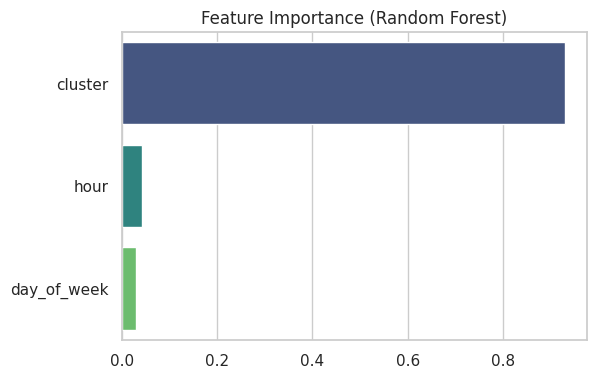

In [10]:
importances = rf_model.feature_importances_
feat_names = features_for_model

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feat_names, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()
